In [222]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [223]:
fileprefix = "full_r_5" # pilot_[1,2,4]
datafolder = '../results/'
filepath = '{}/{}_results.json'.format(datafolder,fileprefix)


In [224]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [243]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        # Update condition here by setting part_object["condition"]
        # print(part_object["condition"])
        part_object["condition"] = 1
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 debug0wvj0
2 debug5DnUv
3 60daf06339dsacaccef1a00932
4 63d8c185bbfa79d8246dd97b
5 60f41127e7575026e5e4de9a
6 60536ffae4f98513b671f482
7 60ee22675c5d675ac2999a0a
8 60c89dd43697d0b926b5b804
9 64581c19e5e95ab59f07be23
10 6162d95040a3fa68f76451be
11 60c9f83c9e07879a1ca4ae3a
12 611a7dcc2dbcd2a013c5eccc
13 5873b2d22bd3c90001859b76
14 615dece448092bd37c41c745
15 614dcc85f9b130cad7844ceb
16 60e6e0af4a78e1589ca09d4f
17 60471ddd0b6ed718cb843760
18 615b41767003d4ece749ed9d
19 611666722763d407c769eb9b
20 5cc707c55ac1240018c17394
21 6165bf9074ec655785050d87
22 605cb98d737d1428130fbf72
23 63d79efd58203fb36a6e7f21
24 608366b0849bd619b8403de8
25 5f07529227813a325372ddd7
26 62ab29bfb1c80887f36dfcf3
27 60b29948c3753b3707dffe90


In [244]:
part_data.keys()


dict_keys(['60daf06339dsacaccef1a00932', '63d8c185bbfa79d8246dd97b', '60f41127e7575026e5e4de9a', '60536ffae4f98513b671f482', '60ee22675c5d675ac2999a0a', '60c89dd43697d0b926b5b804', '64581c19e5e95ab59f07be23', '6162d95040a3fa68f76451be', '60c9f83c9e07879a1ca4ae3a', '611a7dcc2dbcd2a013c5eccc', '5873b2d22bd3c90001859b76', '615dece448092bd37c41c745', '614dcc85f9b130cad7844ceb', '60e6e0af4a78e1589ca09d4f', '60471ddd0b6ed718cb843760', '615b41767003d4ece749ed9d', '611666722763d407c769eb9b', '5cc707c55ac1240018c17394', '6165bf9074ec655785050d87', '605cb98d737d1428130fbf72', '63d79efd58203fb36a6e7f21', '608366b0849bd619b8403de8', '5f07529227813a325372ddd7', '62ab29bfb1c80887f36dfcf3', '60b29948c3753b3707dffe90'])

In [245]:
len(part_data.keys())

25

# Reading Data from Already Created Participant Data Files

In [133]:
fileprefix = "full_r" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [134]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [135]:
len(part_data.keys())

409

In [120]:
print(",\n".join(part_data.keys()))

6132735afe304895d5ac6fd3,
5f11eb333c6e2c0df5b92270,
5c50efd2cc71f4000125ce0d,
5bcf6b423a99c40001542fa1,
63e51e063af1cc5baf0c72ca,
61757c0b9a1b784bb12e99c4,
60f946e5de3e8cd2bb450e8d,
616033a44ba802b7e18daaa9,
6167d795d6dd1c505c4e248b,
63b2d04ed0f53f75de4ba38e,
6110e56bd1d45e7a07aacfc8,
62c4590804317dc197ecbe8a,
615d41de9d320ef4a7401c80,
6155841573df9e7e0d71a709,
5cf62554ba314a001b11b8c4,
60da20b656aa7f69fb3d8f6b,
60cce1dff5946c42b4402084,
616d8b61fc7348856d538881,
60bf964f35e4cada9f7f03cc,
6102db96d41a4bf54acd678b,
57618e8a25224a0006d3756e,
5e93138a7d69590115fa1e21,
5bfece626e6cd80001beb6c0,
629f2a1f516a323b811b8273,
6050cb50a965d6a6eb12361e,
60b60d84e30ac4a5e926b7ca,
64e218df1a2b314bcf5c6269,
616cc1c4244b5866081d3f72,
63ef938aea545fb9bd19a591,
5d64426653ba680017d9f63a,
616ad7ac6299f99ce33cdc78,
5c43724ab00b3300018f49bf,
60f118ee4c766f0022d8cad4,
5b39e7a11d4b6800016944d7,
615c1741d4630b25e6bc1cb9,
649ac723cd5ae98d6a7f5f52,
64a2fecad217a7430e1199c4,
613789190e10970db0b4399f,
5b587d897846

# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [246]:
# List of participants who are excluded and the reason for exclusion

excluded_parts = []

In [247]:
part_stats_dicts = []
extract_max_trials = 40
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    reached_max_trials = False
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except Exception as e:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    clicksL1 = []
    firstLevelAns = {}
    clickStratsValid = True
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']

        if trial_id.startswith("self_report_2"):
            firstLevelAns = trial['trialdata']['response']
        
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
            
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                if extract_max_trials and len(trialScores) == extract_max_trials:
                    if not reached_max_trials:
                        reached_max_trials = True
                        print(f"!!! More than {extract_max_trials} trials found !!!")
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
                clicks = trial['trialdata']['queries']['click']['state']['target']
                cL1 = len([c for c in clicks if int(c) in [1,12,23]])
                clicksL1.append(cL1)
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = int(trial['trialdata']['response']['effort'])
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial
    
    # Checking if click strategies are invalid
    if firstLevelAns:
        # Criteria 1: clicks made on first level nodes on more than 10% of the trials
        madeL1Clicks = sum([bool(c) for c in clicksL1])/len(clicksL1) >= 0.10
        # Criteria 2: did not pay attention to the values at the first level - average agreement with
        #   negative statements greater than 2 (indifference)
        
        # Assessed by answers to Q5 and Q6
        possible_answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
        
        # "... I did pay attention"
        scoreQ5 = possible_answers.index(firstLevelAns["Q5"])
        # "... I did NOT pay attention"
        scoreQ6 = possible_answers.index(firstLevelAns["Q6"])
        adj_scoreQ6 = len(possible_answers) - scoreQ6 - 1
        
        avg_attn_score = (scoreQ5 + adj_scoreQ6) / 2
        clickStratsValid = not madeL1Clicks or (avg_attn_score >= 2)
    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "clicksL1": clicksL1,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "firstLevelAns": firstLevelAns,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses,
        "clickStratsValid": clickStratsValid
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

60daf06339dsacaccef1a00932
60daf06339dsacaccef1a00932 beginning
63d8c185bbfa79d8246dd97b
63d8c185bbfa79d8246dd97b finishHIT
60f41127e7575026e5e4de9a
60f41127e7575026e5e4de9a finishHIT
60536ffae4f98513b671f482
60536ffae4f98513b671f482 finishHIT
60ee22675c5d675ac2999a0a
60ee22675c5d675ac2999a0a finishHIT
60c89dd43697d0b926b5b804
60c89dd43697d0b926b5b804 finishHIT
64581c19e5e95ab59f07be23
64581c19e5e95ab59f07be23 mdp
6162d95040a3fa68f76451be
6162d95040a3fa68f76451be finishHIT
60c9f83c9e07879a1ca4ae3a
60c9f83c9e07879a1ca4ae3a finishHIT
611a7dcc2dbcd2a013c5eccc
611a7dcc2dbcd2a013c5eccc finishHIT
5873b2d22bd3c90001859b76
5873b2d22bd3c90001859b76 finishHIT
615dece448092bd37c41c745
615dece448092bd37c41c745 finishHIT
614dcc85f9b130cad7844ceb
614dcc85f9b130cad7844ceb finishHIT
60e6e0af4a78e1589ca09d4f
60e6e0af4a78e1589ca09d4f mdp
60471ddd0b6ed718cb843760
60471ddd0b6ed718cb843760 mdp
615b41767003d4ece749ed9d
615b41767003d4ece749ed9d finishHIT
611666722763d407c769eb9b
611666722763d407c769eb9b fini

In [248]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

25


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,60daf06339dsacaccef1a00932,2023-09-04 13:33:46.632311,0.596,0.596,1,0.0,0,0.000,0.00,0,beginning,False,6,-1,False
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,1359.000,1352.285,1,2.0,40,1057.731,1762.65,0,finishHIT,False,3,0,True
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2028.000,2020.725,1,1.0,40,1542.795,1792.55,0,finishHIT,False,3,0,True
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,1363.000,1338.404,1,3.0,40,1078.666,70.30,0,finishHIT,False,3,0,True
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2880.000,2860.642,1,1.0,40,1988.254,913.20,0,finishHIT,False,3,1,True
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2404.000,2380.220,1,3.0,40,1836.992,1783.85,0,finishHIT,False,3,1,True
6,64581c19e5e95ab59f07be23,2023-09-04 13:38:04.096780,1621.174,1621.174,1,2.0,36,1349.612,1865.95,0,mdp,False,2,-1,False
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,1710.000,1692.735,1,2.0,40,1133.114,887.70,0,finishHIT,False,3,0,True
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2111.000,2098.073,1,1.0,40,1571.804,1983.10,0,finishHIT,False,3,0,True
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,1691.000,1679.767,1,2.0,40,1260.997,1857.40,0,finishHIT,False,3,0,True


In [249]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

1


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,60daf06339dsacaccef1a00932,2023-09-04 13:33:46.632311,NaT,2023-09-04 13:33:50.755253,6,chrome,macos,en-US,0.596,0.596,...,,{},0,None,True,0.0,0.0,-0.596,NaN,NaN


In [250]:
for p in immediate_drops.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dropout"
    })

In [251]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

24


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,2023-09-04 13:58:58.533726,2023-09-04 13:36:25.586225,3,chrome,windows,en-GB,1359.000,1352.285,...,"Not too hard, it took a few tries to work out ...","{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1762.65,1057.731,-294.554,21766.550000,0.0
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.000,2020.725,...,Not hard at all really,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350000,0.0
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.000,1338.404,...,It was difficult because the amounts kept chan...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950000,0.0
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2023-09-04 14:25:42.041393,2023-09-04 13:37:58.858368,3,chrome,windows,en-ZA,2880.000,2860.642,...,Not so difficult.,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Neither ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,913.20,1988.254,-872.388,39716.100000,0.0
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2023-09-04 14:18:04.741939,2023-09-04 13:38:23.707092,3,chrome,windows,en-ZA,2404.000,2380.220,...,At first tricky then over time got easier,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1783.85,1836.992,-543.228,30308.250000,0.0
6,64581c19e5e95ab59f07be23,2023-09-04 13:38:04.096780,NaT,2023-09-04 13:38:34.362383,2,opera,windows,en-GB,1621.174,1621.174,...,,{},0,None,True,1865.95,1349.612,-271.562,24645.888889,0.0
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.000,1692.735,...,It was very easy from my observation.,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250000,0.0
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.000,2098.073,...,no difficulty,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925000,0.0
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.000,1679.767,...,Not difficult,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625000,0.0
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.000,3458.335,...,"In focusing on the destination, it let me make...","{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850000,0.0


In [252]:
# Partial compensation rates

gbp_hourly = 6.00
secondly_rate = gbp_hourly / (3600)

In [253]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']), row['condition'])
    
early_quitters

1
60471ddd0b6ed718cb843760, 0.62 1


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_97639/3936591574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
14,60471ddd0b6ed718cb843760,2023-09-04 13:46:48.386459,NaT,2023-09-04 13:47:02.119427,6,chrome,windows,en-US,373.855,373.855,...,{},0,None,True,0.0,0.0,-373.855,NaN,NaN,0.623092


In [254]:
for p in early_quitters.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dropout"
    })

In [255]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))
print(len(failed_quiz.loc[failed_quiz.numQuizAttempts == 4]))

print_all = True

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    if row["numQuizAttempts"] == 4 or print_all:
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

2
1
60e6e0af4a78e1589ca09d4f, 0.35
6165bf9074ec655785050d87, 1.23


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_97639/3546998463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
13,60e6e0af4a78e1589ca09d4f,2023-09-04 13:35:58.335293,NaT,2023-09-04 13:36:13.543807,2,firefox,macos,en-US,550.188,550.188,...,{},0,None,True,0.0,210.883,-339.305,NaN,NaN,0.351472
18,6165bf9074ec655785050d87,2023-09-04 13:49:35.557380,NaT,2023-09-04 13:50:10.219470,6,chrome,windows,en-ZA,1084.677,1084.677,...,{},0,None,True,0.0,740.214,-344.463,NaN,NaN,1.233690


In [256]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
13,60e6e0af4a78e1589ca09d4f,1.0,mdp,0
18,6165bf9074ec655785050d87,4.0,mdp,0


In [257]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

60e6e0af4a78e1589ca09d4f	1
6165bf9074ec655785050d87	1


In [258]:
for p in failed_quiz.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "quizfail"
    })

In [259]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

21


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,2023-09-04 13:58:58.533726,2023-09-04 13:36:25.586225,3,chrome,windows,en-GB,1359.000,1352.285,...,"Not too hard, it took a few tries to work out ...","{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1762.65,1057.731,-294.554,21766.550000,0.0
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.000,2020.725,...,Not hard at all really,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350000,0.0
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.000,1338.404,...,It was difficult because the amounts kept chan...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950000,0.0
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2023-09-04 14:25:42.041393,2023-09-04 13:37:58.858368,3,chrome,windows,en-ZA,2880.000,2860.642,...,Not so difficult.,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Neither ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,913.20,1988.254,-872.388,39716.100000,0.0
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2023-09-04 14:18:04.741939,2023-09-04 13:38:23.707092,3,chrome,windows,en-ZA,2404.000,2380.220,...,At first tricky then over time got easier,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1783.85,1836.992,-543.228,30308.250000,0.0
6,64581c19e5e95ab59f07be23,2023-09-04 13:38:04.096780,NaT,2023-09-04 13:38:34.362383,2,opera,windows,en-GB,1621.174,1621.174,...,,{},0,None,True,1865.95,1349.612,-271.562,24645.888889,0.0
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.000,1692.735,...,It was very easy from my observation.,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250000,0.0
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.000,2098.073,...,no difficulty,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925000,0.0
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.000,1679.767,...,Not difficult,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625000,0.0
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.000,3458.335,...,"In focusing on the destination, it let me make...","{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850000,0.0


In [260]:
data_actually_complete = ["60dc380c84658bee9d398f7b", "616cc1c4244b5866081d3f72", "60ef2e52a188d9859f92bb58",
                          "5cf62554ba314a001b11b8c4", "6167d795d6dd1c505c4e248b", "615c8fc0e879402ccc07472a"]

In [261]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint", "demographicsAvailable"]]

3


,workerId,numTrialsCompleted,dropoutPoint,demographicsAvailable
6,64581c19e5e95ab59f07be23,36,mdp,False
19,605cb98d737d1428130fbf72,39,mdp,False
24,60b29948c3753b3707dffe90,21,mdp,False


In [262]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

64581c19e5e95ab59f07be23	1
605cb98d737d1428130fbf72	1
60b29948c3753b3707dffe90	1


In [263]:

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = []


In [264]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))#, row['condition'])
incomplete_partial

0


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus


In [265]:
for p in incomplete_data.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dataincomplete"
    })

In [266]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
complete_data

0
18


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,2023-09-04 13:58:58.533726,2023-09-04 13:36:25.586225,3,chrome,windows,en-GB,1359.0,1352.285,...,"Not too hard, it took a few tries to work out ...","{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1762.65,1057.731,-294.554,21766.550,0.0
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.0,2020.725,...,Not hard at all really,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350,0.0
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.0,1338.404,...,It was difficult because the amounts kept chan...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950,0.0
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2023-09-04 14:25:42.041393,2023-09-04 13:37:58.858368,3,chrome,windows,en-ZA,2880.0,2860.642,...,Not so difficult.,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Neither ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,913.20,1988.254,-872.388,39716.100,0.0
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2023-09-04 14:18:04.741939,2023-09-04 13:38:23.707092,3,chrome,windows,en-ZA,2404.0,2380.220,...,At first tricky then over time got easier,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1783.85,1836.992,-543.228,30308.250,0.0
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.0,1692.735,...,It was very easy from my observation.,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250,0.0
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.0,2098.073,...,no difficulty,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925,0.0
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.0,1679.767,...,Not difficult,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625,0.0
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.0,3458.335,...,"In focusing on the destination, it let me make...","{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850,0.0
11,615dece448092bd37c41c745,2023-09-04 13:37:11.800167,2023-09-04 14:10:53.553173,2023-09-04 13:37:28.494591,3,chrome,windows,en-US,2021.0,2003.344,...,the the random changes and charges for each re...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,591.55,1345.619,-657.725,18460.900,0.0


In [267]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

63d8c185bbfa79d8246dd97b	1
60f41127e7575026e5e4de9a	1
60536ffae4f98513b671f482	1
60ee22675c5d675ac2999a0a	1
60c89dd43697d0b926b5b804	1
6162d95040a3fa68f76451be	1
60c9f83c9e07879a1ca4ae3a	1
611a7dcc2dbcd2a013c5eccc	1
5873b2d22bd3c90001859b76	1
615dece448092bd37c41c745	1
614dcc85f9b130cad7844ceb	1
615b41767003d4ece749ed9d	1
611666722763d407c769eb9b	1
5cc707c55ac1240018c17394	1
63d79efd58203fb36a6e7f21	1
608366b0849bd619b8403de8	1
5f07529227813a325372ddd7	1
62ab29bfb1c80887f36dfcf3	1


In [268]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

18


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,2023-09-04 13:58:58.533726,2023-09-04 13:36:25.586225,3,chrome,windows,en-GB,1359.0,1352.285,...,"Not too hard, it took a few tries to work out ...","{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1762.65,1057.731,-294.554,21766.550,0.0
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.0,2020.725,...,Not hard at all really,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350,0.0
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.0,1338.404,...,It was difficult because the amounts kept chan...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950,0.0
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2023-09-04 14:25:42.041393,2023-09-04 13:37:58.858368,3,chrome,windows,en-ZA,2880.0,2860.642,...,Not so difficult.,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Neither ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,913.20,1988.254,-872.388,39716.100,0.0
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2023-09-04 14:18:04.741939,2023-09-04 13:38:23.707092,3,chrome,windows,en-ZA,2404.0,2380.220,...,At first tricky then over time got easier,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1783.85,1836.992,-543.228,30308.250,0.0
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.0,1692.735,...,It was very easy from my observation.,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250,0.0
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.0,2098.073,...,no difficulty,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925,0.0
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.0,1679.767,...,Not difficult,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625,0.0
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.0,3458.335,...,"In focusing on the destination, it let me make...","{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850,0.0
11,615dece448092bd37c41c745,2023-09-04 13:37:11.800167,2023-09-04 14:10:53.553173,2023-09-04 13:37:28.494591,3,chrome,windows,en-US,2021.0,2003.344,...,the the random changes and charges for each re...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,591.55,1345.619,-657.725,18460.900,0.0


In [269]:
#full_bonus_eligible.loc[full_bonus_eligible.workerId == "5f6214a59413141f7cb2508c"]

In [270]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

fix_bonus_rate = True
fixed_bonus_rate = 0.000833


bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    if not fix_bonus_rate:
        bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()
    else:
        bonus_rate[condition] = fixed_bonus_rate

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
1,63d8c185bbfa79d8246dd97b,2023-09-04 13:36:19.271189,2023-09-04 13:58:58.533726,2023-09-04 13:36:25.586225,3,chrome,windows,en-GB,1359.0,1352.285,...,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1762.65,1057.731,-294.554,21766.550,0.0,1.468287
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.0,2020.725,...,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350,0.0,1.493194
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.0,1338.404,...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950,0.0,0.058560
4,60ee22675c5d675ac2999a0a,2023-09-04 13:37:41.898793,2023-09-04 14:25:42.041393,2023-09-04 13:37:58.858368,3,chrome,windows,en-ZA,2880.0,2860.642,...,"{'Q0': 'Agree', 'Q1': 'Agree', 'Q2': 'Neither ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,913.20,1988.254,-872.388,39716.100,0.0,0.760696
5,60c89dd43697d0b926b5b804,2023-09-04 13:38:00.317869,2023-09-04 14:18:04.741939,2023-09-04 13:38:23.707092,3,chrome,windows,en-ZA,2404.0,2380.220,...,"{'Q0': 'Strongly agree', 'Q1': 'Strongly agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",False,1783.85,1836.992,-543.228,30308.250,0.0,1.485947
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.0,1692.735,...,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250,0.0,0.739454
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.0,2098.073,...,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925,0.0,1.651922
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.0,1679.767,...,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625,0.0,1.547214
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.0,3458.335,...,"{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850,0.0,1.827685
11,615dece448092bd37c41c745,2023-09-04 13:37:11.800167,2023-09-04 14:10:53.553173,2023-09-04 13:37:28.494591,3,chrome,windows,en-US,2021.0,2003.344,...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,591.55,1345.619,-657.725,18460.900,0.0,0.492761


In [271]:
# Bonus rates

bonus_rate

{1: 0.000833}

In [272]:
print_bonuses = True

p_list = []
# Printing completed IDs for approval + bonuses
for idx, row in full_bonus_eligible.iterrows():
    p_list.append(row['workerId'])
    if not print_bonuses:
        print('{0}'.format(row['workerId']))
    else:
        if(row['bonus'] > 0):
            print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))


63d8c185bbfa79d8246dd97b, 1.47
60f41127e7575026e5e4de9a, 1.49
60536ffae4f98513b671f482, 0.06
60ee22675c5d675ac2999a0a, 0.76
60c89dd43697d0b926b5b804, 1.49
6162d95040a3fa68f76451be, 0.74
60c9f83c9e07879a1ca4ae3a, 1.65
611a7dcc2dbcd2a013c5eccc, 1.55
5873b2d22bd3c90001859b76, 1.83
615dece448092bd37c41c745, 0.49
614dcc85f9b130cad7844ceb, 1.24
63d79efd58203fb36a6e7f21, 1.81
608366b0849bd619b8403de8, 0.93
5f07529227813a325372ddd7, 1.83
62ab29bfb1c80887f36dfcf3, 1.33


In [273]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

1.0050399527777776
0.7331053489076144



Condition: 0
Mean: nan
Std: nan
Median: nan

Condition: 1
Mean: 33.32906944444444
Std: 8.761113076227963
Median: 32.83130833333333


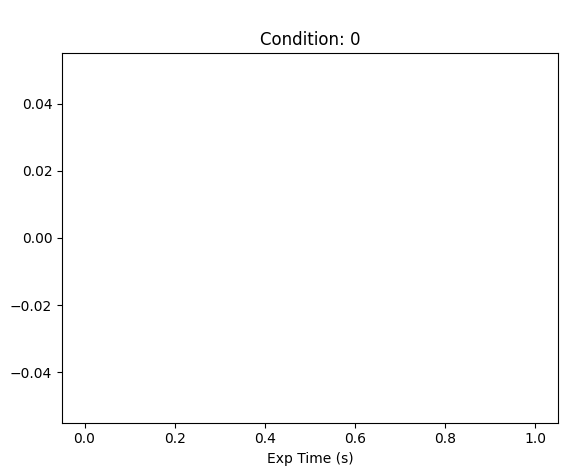

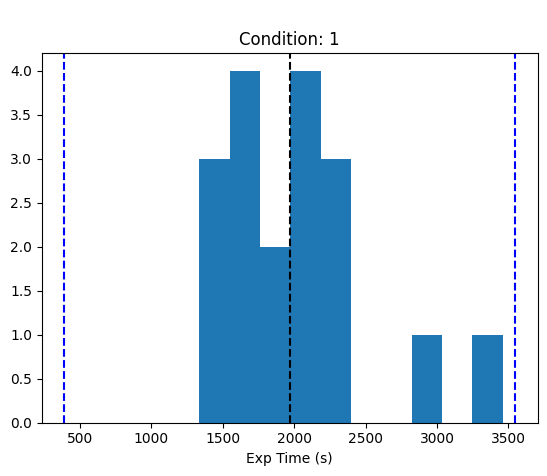

In [274]:
# Time taken per condition

exceeded_parts = []

for condition in [0,1]:
    print("\nCondition: " +str(condition))
    condition_df = complete_data.loc[complete_data.condition == condition]
    clength = condition_df.expLength
    mean = clength.mean()
    sd = clength.std()
    med = clength.median()
    print("Mean: " + str(mean/60))
    print("Std: " + str(sd/60))
    print("Median: " + str(med/60))
    
    time_exceed_df = condition_df.loc[(condition_df.expLength > med + 3*sd) | (condition_df.expLength < med - 3*sd)]
    exceeded_parts += list(time_exceed_df.workerId)
    
    plt.figure()
    plt.hist(clength)
    plt.axvline(med, linestyle='--', color='black')
    plt.axvline(med + 3*sd, linestyle='--', color='blue')
    plt.axvline(med - 3*sd, linestyle='--', color='blue')
    plt.title("\nCondition: " +str(condition))
    plt.xlabel("Exp Time (s)")
    
plt.show()


In [275]:
# Exclude based on time only with full dataset, not with partial dataset
exclude_time = False

In [276]:
# Excluding participants based on time

if exclude_time:
    within_time_parts = complete_data.loc[~complete_data.workerId.isin(exceeded_parts)]
else:
    within_time_parts = complete_data
print(len(within_time_parts.loc[within_time_parts.condition == 0]))
print(len(within_time_parts.loc[within_time_parts.condition == 1]))
print("\n")
for part in exceeded_parts:
    print(part, list(complete_data.loc[complete_data.workerId == part]["condition"])[0])

0
18




In [277]:
if exclude_time:
    for p in exceeded_parts:
        excluded_parts.append({
            "workerId": p,
            "reason": "exceededTime"
        })

In [278]:
# Excluding participants based on effort
ineffortful_parts = within_time_parts.loc[within_time_parts.effort > 1]
ineffortful_parts[["workerId", "condition", "effort"]]


,workerId,condition,effort


In [279]:
effortful_parts = within_time_parts.loc[~within_time_parts.workerId.isin(list(ineffortful_parts.workerId))]
print(len(effortful_parts.loc[effortful_parts.condition == 0]))
print(len(effortful_parts.loc[effortful_parts.condition == 1]))


0
18


In [280]:
for p in ineffortful_parts.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "noeffort"
    })

In [281]:
# Excluding participants who already have done the task
for idx, (workerId, ans) in effortful_parts[["workerId","alreadyParticipated"]].iterrows():
    if "no" not in ans.lower() and "never" not in ans.lower():
        print(workerId, ans)

60ee22675c5d675ac2999a0a Yes I did.


In [283]:
# Already participated have to be filtered manually

already_participated_ids = ["60ee22675c5d675ac2999a0a"]

already_participated = effortful_parts.loc[effortful_parts.workerId.isin(already_participated_ids)]
already_participated[["workerId", "condition"]]

,workerId,condition
4,60ee22675c5d675ac2999a0a,1


In [284]:
for p in already_participated.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "alreadyparticipated"
    })

In [285]:
new_parts = effortful_parts.loc[~effortful_parts.workerId.isin(already_participated_ids)]
print(len(new_parts.loc[new_parts.condition == 0]))
print(len(new_parts.loc[new_parts.condition == 1]))

0
17


In [286]:
# Participant data that is complete and that also has valid click strategies 

valid_click_strat_data = new_parts.loc[new_parts.clickStratsValid]
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 0]))
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
valid_click_strat_data

0
15


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
2,60f41127e7575026e5e4de9a,2023-09-04 13:36:36.826275,2023-09-04 14:10:25.613483,2023-09-04 13:36:43.231061,3,chrome,windows,en-ZA,2028.0,2020.725,...,Not hard at all really,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,1792.55,1542.795,-477.930,33705.350,0.0
3,60536ffae4f98513b671f482,2023-09-04 13:36:24.829462,2023-09-04 13:59:08.714794,2023-09-04 13:36:49.121476,3,chrome,windows,en-US,1363.0,1338.404,...,It was difficult because the amounts kept chan...,"{'Q0': 'Agree', 'Q1': 'Strongly disagree', 'Q2...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,70.30,1078.666,-259.738,17175.950,0.0
7,6162d95040a3fa68f76451be,2023-09-04 13:38:33.606358,2023-09-04 14:07:04.472503,2023-09-04 13:38:47.252880,3,chrome,windows,en-US,1710.0,1692.735,...,It was very easy from my observation.,"{'Q0': 'Strongly agree', 'Q1': 'Neither disagr...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,887.70,1133.114,-559.621,19970.250,0.0
8,60c9f83c9e07879a1ca4ae3a,2023-09-04 13:38:43.143707,2023-09-04 14:13:54.995431,2023-09-04 13:38:56.007222,3,chrome,windows,en-GB,2111.0,2098.073,...,no difficulty,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,1983.10,1571.804,-526.269,30941.925,0.0
9,611a7dcc2dbcd2a013c5eccc,2023-09-04 13:36:18.682766,2023-09-04 14:04:30.186175,2023-09-04 13:36:29.069363,3,chrome,windows,en-US,1691.0,1679.767,...,Not difficult,"{'Q0': 'Disagree', 'Q1': 'Disagree', 'Q2': 'Ne...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1857.40,1260.997,-418.770,21413.625,0.0
10,5873b2d22bd3c90001859b76,2023-09-04 13:38:17.899850,2023-09-04 14:37:27.424118,2023-09-04 13:39:48.600925,3,chrome,linux,en-GB,3549.0,3458.335,...,"In focusing on the destination, it let me make...","{'Q0': 'Disagree', 'Q1': 'Strongly disagree', ...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,2194.10,2606.157,-852.178,34158.850,0.0
11,615dece448092bd37c41c745,2023-09-04 13:37:11.800167,2023-09-04 14:10:53.553173,2023-09-04 13:37:28.494591,3,chrome,windows,en-US,2021.0,2003.344,...,the the random changes and charges for each re...,"{'Q0': 'Strongly disagree', 'Q1': 'Disagree', ...",0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,591.55,1345.619,-657.725,18460.900,0.0
12,614dcc85f9b130cad7844ceb,2023-09-04 13:40:44.451924,2023-09-04 14:11:35.716303,2023-09-04 13:40:59.340059,3,chrome,windows,en-US,1851.0,1833.876,...,It was not that difficult as I had to only mem...,"{'Q0': 'Agree', 'Q1': 'Disagree', 'Q2': 'Agree...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1484.05,1199.530,-634.346,21080.800,0.0
15,615b41767003d4ece749ed9d,2023-09-04 13:41:03.574761,2023-09-04 14:10:00.408672,2023-09-04 13:41:17.410193,3,chrome,windows,en-US,1736.0,1721.930,...,It was not difficult,"{'Q0': 'Agree', 'Q1': 'Neither disagree nor ag...",0,"{'Q0': '$-2 to $2', 'Q1': '$-4 to $4', 'Q2': '...",True,-210.90,1178.478,-543.452,19140.925,0.0
16,611666722763d407c769eb9b,2023-09-04 13:37:15.006830,2023-09-04 14:10:00.899111,2023-09-04 13:37:34.583475,3,chrome,windows,en-ZA,1965.0,1936.413,...,fairly easy,"{'Q0': 'Neither disagree nor agree', 'Q1': 'Di...",0,"{'Q0': '$-16 to 16', 'Q1': '$-4 to $4', 'Q2': ...",True,-243.00,1207.601,-728.812,22359.325,0.0


In [287]:
# Excluding participants

invalid_click_strat_data = new_parts.loc[~new_parts.clickStratsValid]
for p in invalid_click_strat_data.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "invalidClickStrats"
    })

In [288]:
# Final score per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = new_parts.loc[new_parts.condition == condition].finalScore
    print("Mean: " + str(clength.mean()))
    print("Std: " + str(clength.std()))
    print("Median: " + str(clength.median()))


Condition: 0
Mean: nan
Std: nan
Median: nan

Condition: 1
Mean: 1223.785294117647
Std: 904.0202975398122
Median: 1602.35

Condition: 2
Mean: nan
Std: nan
Median: nan


In [289]:
# Updating all files of participants whose data should be excluded

for ep in excluded_parts:
    w = ep["workerId"]
    # Get the file name 
    file = [fn for fn in os.listdir(datafolder) if w in fn][0]
    fpath = datafolder + file
    # Read the json
    with open(fpath, 'r') as f:
        participant = json.load(f)
    # Add the fields
    participant["excludeReason"] = ep["reason"]
    # Rewrite the file
    with open(fpath, 'w') as fw:
        json.dump(participant, fw)
    print(f"Wrote to {file}: {ep['reason']}")
    
    

Wrote to full_r_5_60daf06339dsacaccef1a00932.json: dropout
Wrote to full_r_5_60471ddd0b6ed718cb843760.json: dropout
Wrote to full_r_5_60e6e0af4a78e1589ca09d4f.json: quizfail
Wrote to full_r_5_6165bf9074ec655785050d87.json: quizfail
Wrote to full_r_5_64581c19e5e95ab59f07be23.json: dataincomplete
Wrote to full_r_5_605cb98d737d1428130fbf72.json: dataincomplete
Wrote to full_r_5_60b29948c3753b3707dffe90.json: dataincomplete
Wrote to full_r_5_60ee22675c5d675ac2999a0a.json: alreadyparticipated
Wrote to full_r_5_63d8c185bbfa79d8246dd97b.json: invalidClickStrats
Wrote to full_r_5_60c89dd43697d0b926b5b804.json: invalidClickStrats


In [116]:
sorted(list(new_parts.workerId))

['5512eee1fdf99b7e1fb1be40',
 '57618e8a25224a0006d3756e',
 '594abd98215cbd000146debc',
 '5bc35acbe5fc0200012ab7c1',
 '5bfece626e6cd80001beb6c0',
 '5c37ac66bc6444000133b38e',
 '5c43724ab00b3300018f49bf',
 '5c50efd2cc71f4000125ce0d',
 '5cf62554ba314a001b11b8c4',
 '5d3983cb8580230018bbf15f',
 '5d64426653ba680017d9f63a',
 '5d7121a843311c0015753cda',
 '5dde77287d4595dd82f57b10',
 '5e0e0f1af9e75055f77d4ec8',
 '5e72087440aeca126bf6326c',
 '5e93138a7d69590115fa1e21',
 '5ed023de5416bd0ef79fce34',
 '5ef09df28c610f5ffa1601c9',
 '5f11eb333c6e2c0df5b92270',
 '5f1bfe98441e2743f34fa16a',
 '5f2428a843b54d0008905e34',
 '5f45f6591d2bed2170be6c38',
 '5f4b75ca7f5251735fe9b00a',
 '5f7ec762e9dbb819b8b532c6',
 '5fa44f4fd6ecf103ec1d2546',
 '5fbb9d170045d6d085a9bbbf',
 '60867f15c6327e78242c627c',
 '609101a8a29bc713a6bcdbba',
 '60927707758ca118d00ac04b',
 '609ba07731fd79b734cc614e',
 '60a175ae6556e3a7f22c2923',
 '60abb40fe8824c6f9007faeb',
 '60b60d84e30ac4a5e926b7ca',
 '60b880518b31da36270782eb',
 '60bf964f35e4

# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [88]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [89]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [90]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            if trial_count > 40: 
                print(workerId)
                continue
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1


In [81]:
# Write to CSV file

with open('../results/mouselab-mdp-final-misaligned.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [91]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [69]:
len(complete_data)

88

In [70]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: Nothing was confusing or hard to understand
Already participated: I did not
Comments: The experiment ran smoothly


Feedback: No, the instructions were clear and so was the game.
Already participated: No, it was my first time doing this kind of game, hope to get more soon.
Comments: Can I please receive more games like this, I really enjoyed playing it.


Feedback: no
Already participated: no


Feedback: no i understood ok
Already participated: no i have not done this before
Comments: enjoyable task :)


Feedback: Not particularly, it was fun.
Already participated: I haven't participated in this game before.
Comments: Thank you for letting me participate. 


Feedback: No
Already participated: No, I have not participated before
Comments: N/A


Feedback: NO
Already participated: No I have never participated in Web of Cash HIT before
Comments: I enjoyed the game but was a little bit tricky at first


Feedback: No
Already participated: No
Comments: None


Feedback: no. the instru

In [71]:
# Demographics:

which_df = new_parts

conditions = {
    0: "Control",
    1: "Misaligned"
}

ages = {
    "all" : which_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]

try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    ages[cond] = sub_df["age"].astype("int")
    gender_unique, gender_counts = np.unique(sub_df.gender, return_counts=True)
    genders = np.asarray((gender_unique, gender_counts)).T
    num_male[cond] = genders[np.where(genders[:,0] == "male")[0][0], 1]
    num_female[cond] = genders[np.where(genders[:,0] == "female")[0][0], 1]
    try:
        num_other[cond] = genders[np.where(genders[:,0] == "other")[0][0], 1]
    except:
        num_other[cond] = 0


efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMean: {0:0.3f}".format(ages[cond].mean()))
    print("\t\tSD: {0:0.3f}".format(ages[cond].std()))
    print("\t\tMedian: {0:0.3f}".format(ages[cond].median()))
    print("\t\tMax: {0:0.3f}".format(ages[cond].max()))
    print("\t\tMin: {0:0.3f}".format(ages[cond].min()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMale: {0} ({1:0.2f}%)".format(num_male[cond], (100 * num_male[cond] / len(sub_df))))
    print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female[cond], (100 * num_female[cond] / len(sub_df))))
    print("\t\tOther: {0} ({1:0.2f}%)".format(num_other[cond], (100 * num_other[cond] / len(sub_df))))


Age stats:
	Overall:
		Mean: 29.786
		SD: 9.517
		Median: 28.000
		Max: 60.000
		Min: -1.000
	Control:
		Mean: 28.674
		SD: 7.580
		Median: 27.000
		Max: 56.000
		Min: 19.000
	Misaligned:
		Mean: 30.951
		SD: 11.176
		Median: 29.000
		Max: 60.000
		Min: -1.000
Gender stats:
	Overall:
		Male: 30 (35.71%)
		Female: 54 (64.29%)
		Other: 0 (0.00%)
	Control:
		Male: 14 (32.56%)
		Female: 29 (67.44%)
		Other: 0 (0.00%)
	Misaligned:
		Male: 16 (39.02%)
		Female: 25 (60.98%)
		Other: 0 (0.00%)


In [72]:
# Effort:

which_df = new_parts

conditions = {
    0: "Control",
    1: "Misaligned"
}


for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    print("\n" + conditions[cond])
    print(sub_df["effort"].value_counts())




Control
effort
0    39
1     4
Name: count, dtype: int64

Misaligned
effort
0    32
1     9
Name: count, dtype: int64


In [73]:
# Comments on difficulty and strategy - all conditions

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        printed = False
        if len(part["whatStrategy"]) > 0:
            print("Strategy Used: " + part["whatStrategy"])
            printed = True
        if len(part["strategyImprove"]) > 0:
            print("How strategy was improved: " + part["strategyImprove"])
            printed = True
        if len(part["difficult"]) > 0:
            print("Difficulty: " + part["difficult"])
            printed = True
        if printed:
            print("\n")


------ Control ------

Strategy Used: When clicking a node if it had a value of 30 0r more I would head for that on most occasions but would sometimes deviate from this.
How strategy was improved: Yes took more notice of amounts as game progressed.
Difficulty: Because numbers seemed a bit random felt a bit of a guessing game at times.


Strategy Used: I found which end nodes had the highest value and then went towards them
How strategy was improved: At first i struggled guessing randomly but then realised the best option was to find the highest end nodes
Difficulty: it was diffuclt to begin but once i got to grips with the task better i found it easier


Strategy Used: I used the nodes inspector on the nodes which I thought would be my end target to see if I was satisfied with the amount, if it was a decent credit I would head to that node.  I tried to see the value of few a nodes as possible to save the expense
How strategy was improved: I'm not sure I did, if at all only by using th

In [81]:
# Stats on self-report of clicks at first level - all conditions

questions = {
    "Q0": "In most rounds, I clicked the nodes at the first level.",
    "Q1": "When ..., it was ONLY to receive the immediate $0.25 reward.",
    "Q2": "When ..., it was NOT ONLY to receive the immediate $0.25 reward.",
    "Q3": "When ..., I did it to see the numbers that were present at those nodes.",
    "Q4": "When ..., I did for another reason than to see the numbers that were present at those nodes.",
    "Q5": "When ..., I paid attention to the numbers that were present at those nodes.",
    "Q6": "When ..., I did NOT pay attention to the numbers that were present at those nodes."
}

longest_q_len = max([len(a) for a in questions.values()])

df_dicts = []

# Pad answers with spaces
for q in questions.keys():
    qtext = questions[q]
    questions[q] += "".join([" "] * (longest_q_len - len(qtext)))

answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
answer_abbr_map = {a: ''.join([w[0] for w in a.split(" ")]).upper() for a in answers}

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        if part['workerId'] not in list(complete_data.workerId): continue
        printed = False
        prop_L1clicks = sum([bool(c) for c in part["clicksL1"]])/len(part["clicksL1"])
        if prop_L1clicks < 0.1: continue
        print("\n", part["workerId"], part["clickStratsValid"], prop_L1clicks)
        for qnum, ans in part["firstLevelAns"].items():
            print(questions[qnum], "\t", answer_abbr_map[ans])#answers.index(ans))
        dict_ = {k: answers.index(v) for (k,v) in part["firstLevelAns"].items()}
        dict_["cL1_mean"] = np.mean(part["clicksL1"])
        df_dicts.append(dict_)
        printed = True
        if printed:
            print("\n")
            
strategy_ans_df = pd.DataFrame.from_dict(df_dicts).dropna()


------ Control ------


 63f787256fc87f0a297a849c True 0.125



 6137753896c9b6b5813a2432 True 0.1



 5b4e2703995d4e0001093117 True 0.35



 5eb64825c23fbf5300fb5bd9 True 0.3



 616ed458582d2c3b50149493 True 0.125



 5fc00a11268eb941e7d8b066 True 0.125



 6113d1d02fbd58ed15b3c8e0 True 0.775



 6122ba6ef91f0ace90542531 True 0.125



 6103b1577404ce2e3e20ceb1 True 0.2



 616ab139038c7029d826e63b True 0.15



 60fd2fe06849943770465f94 True 0.125



 5f1195fdae9a1601ce9ba2c1 True 0.15



 611d3e4fb9e2cb38be842d00 True 0.175



 60fb1cab39fd626cb9dc093b True 0.7



 611cbdc447871199a422d10f True 0.125



 615f4ddc420b1b75f246a4ec True 0.1



 615f1f19a64adde54a57ba27 True 0.15



 5f003e622ec97b13f2764ec9 True 0.725



 60ebda46268b3e82f52b4dfd True 0.45



 6131023dd3d448c3c1102d67 True 0.225



 615fdd9674ec001e9d325841 True 0.15



 60719da557d8241609b26e83 True 0.425



 6153554048e1825ac1946e84 True 0.425



 6157671b6ca7514f658ed117 True 0.3



 60a50457d02bfc23c02d4717 True 0.

0.42776839794048493


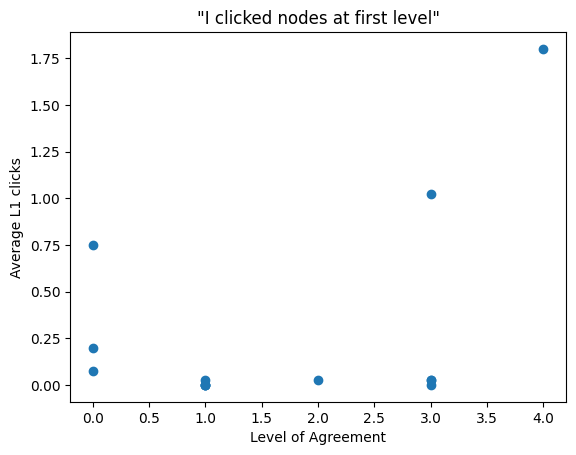

In [61]:
print(strategy_ans_df["Q0"].corr(strategy_ans_df["cL1_mean"]))
plt.scatter(strategy_ans_df["Q0"], strategy_ans_df["cL1_mean"])
plt.title("\"I clicked nodes at first level\"")
plt.xlabel("Level of Agreement")
plt.ylabel("Average L1 clicks")
plt.show()

In [113]:
strategy_ans_df["Q4"].value_counts().sort_index()

Q4
0.0    5
1.0    4
2.0    3
4.0    2
Name: count, dtype: int64

In [156]:
strategy_ans_df.where(strategy_ans_df > 2, 100)

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,3.0,100.0,100.0,100.0,3.0,100.00
1,3.0,100.0,3.0,100.0,3.0,100.00
2,100.0,100.0,3.0,100.0,100.0,100.00
3,4.0,100.0,4.0,4.0,100.0,100.00
4,3.0,100.0,100.0,3.0,100.0,100.00
5,3.0,100.0,100.0,3.0,100.0,100.00
6,100.0,100.0,100.0,100.0,100.0,100.00
8,4.0,100.0,3.0,100.0,3.0,100.00
9,100.0,3.0,100.0,4.0,4.0,100.00
10,100.0,100.0,100.0,3.0,100.0,100.00


In [165]:
agreement_df == 2

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
8,False,True,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False


In [172]:
agreement_df = strategy_ans_df.copy()
agreement_df = agreement_df.where(agreement_df >= 2, -1)
agreement_df = agreement_df.where(agreement_df <= 2, 1)
agreement_df = agreement_df.where(agreement_df != 2, 0)
agreement_df["cL1_mean"] = strategy_ans_df["cL1_mean"]

agreement_df

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,1.0,-1.0,-1.0,-1.0,1.0,0.12
1,1.0,-1.0,1.0,-1.0,1.0,0.36
2,-1.0,-1.0,1.0,-1.0,0.0,0.04
3,1.0,-1.0,1.0,1.0,-1.0,1.96
4,1.0,-1.0,-1.0,1.0,-1.0,0.00
5,1.0,-1.0,-1.0,1.0,0.0,0.60
6,-1.0,-1.0,-1.0,-1.0,-1.0,0.00
8,1.0,0.0,1.0,-1.0,1.0,0.00
9,-1.0,1.0,-1.0,1.0,1.0,0.28
10,-1.0,-1.0,-1.0,1.0,-1.0,0.00


In [176]:
(agreement_df["Q1"] + agreement_df["Q2"]).value_counts()

 0.0    13
-2.0    10
-1.0     4
 1.0     2
Name: count, dtype: int64

In [85]:
correct_answers = {
    "Q0": "$-2 to $2",
    "Q1": "$-16 to $16",
    "Q2": "$-88 to $88"
}

num_correct = {}
questions_correct = {}
bonus = {}

for cond in conditions.keys():
    num_correct[cond] = []
    questions_correct[cond] = {
        "Q0": 0,
        "Q1": 0,
        "Q2": 0
    }
    bonus[cond] = []
    sub_df = complete_data.loc[complete_data.condition == cond]
    for idx, row in sub_df.iterrows():
        part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
        part_answers = part['final_quiz_responses']
        part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
        num_correct[cond].append(part_correct_answers)
        for q in correct_answers.keys():
            questions_correct[cond][q] += int(part_answers[q] == correct_answers[q])
        part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
        bonus[cond].append(part_bonus)



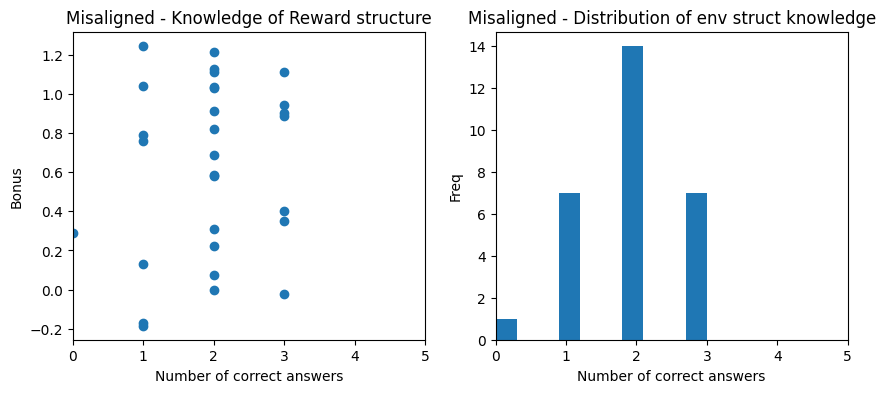

In [86]:


for idx, (cond, condname) in enumerate(conditions.items()):
    plt.figure(figsize=(5 * 2,4 * len(conditions)))
    plt.subplot(1,2,1)
    plt.scatter(num_correct[cond], bonus[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Bonus")
    plt.title(f"{condname} - Knowledge of Reward structure")
    plt.xlim([0,5])
    plt.subplot(1,2,2)
    plt.hist(num_correct[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Freq")
    plt.xlim([0,5])
    plt.title(f"{condname} - Distribution of env struct knowledge")

plt.show()

In [87]:
questions_correct

{0: {'Q0': 20, 'Q1': 13, 'Q2': 23}}